## 데이터 분석 흐름
### 0. Set Environment
- 패키지 설치<br>
  \> `install.packages("패키지명")`
- 패키지 불러오기<br>
  \> `library(패키지명)`

### 1. 데이터 마트 구축
#### 1) Data Collection
다양한 원천 데이터베이스에서 데이터, 파일을 읽고 전체 혹은 조건에 따른 일부분을 통합하여 데이터 마트를 구축한다.
- 데이터 수집<br>
  R 내 `sqldf` 패키지로 sql 명령어를 사용해 데이터를 수집할 수 있다.
- 데이터 선택<br>
  \> `변수[조건식]`<br>
  \> `subset(변수, select=±이름/컬럼명/c(컬럼명1, 컬럼명2 …), subset=조건식)`<br>
  예시) df[df$컬럼 = 4], subset(df, select = 컬럼, subset = 컬럼>4)
- 데이터 병합<br>
  \> `rbind|cbind(데이터프레임1, 데이터프레임2 …)`, `merge(데이터프레임1, 데이터프레임2 …, by=공통열)`

#### 2) Data Mining 
- R 기본제공
  - `apply(MATRIX, 1(행)/2(열), 함수)`: 행렬의 특정 방향으로 함수를 적용한다.<br>
     예시) apply(mtx, 1, sum)
- plyr package
  - `ddply(DATAFRAME, 열, 함수)`: dataframe$열에 함수를 적용한 뒤 dataframe으로 반환한다.
- Reshape package  
  - **`melt(데이터, id=c(인덱스열1,인덱스열2 …), na.rm=T)`**
  - **`cast(데이터, 인덱스열/인덱스열1+인덱스열2 … ~ 컬럼열/컬럼열1+컬럼열2 …, 함수)`**
  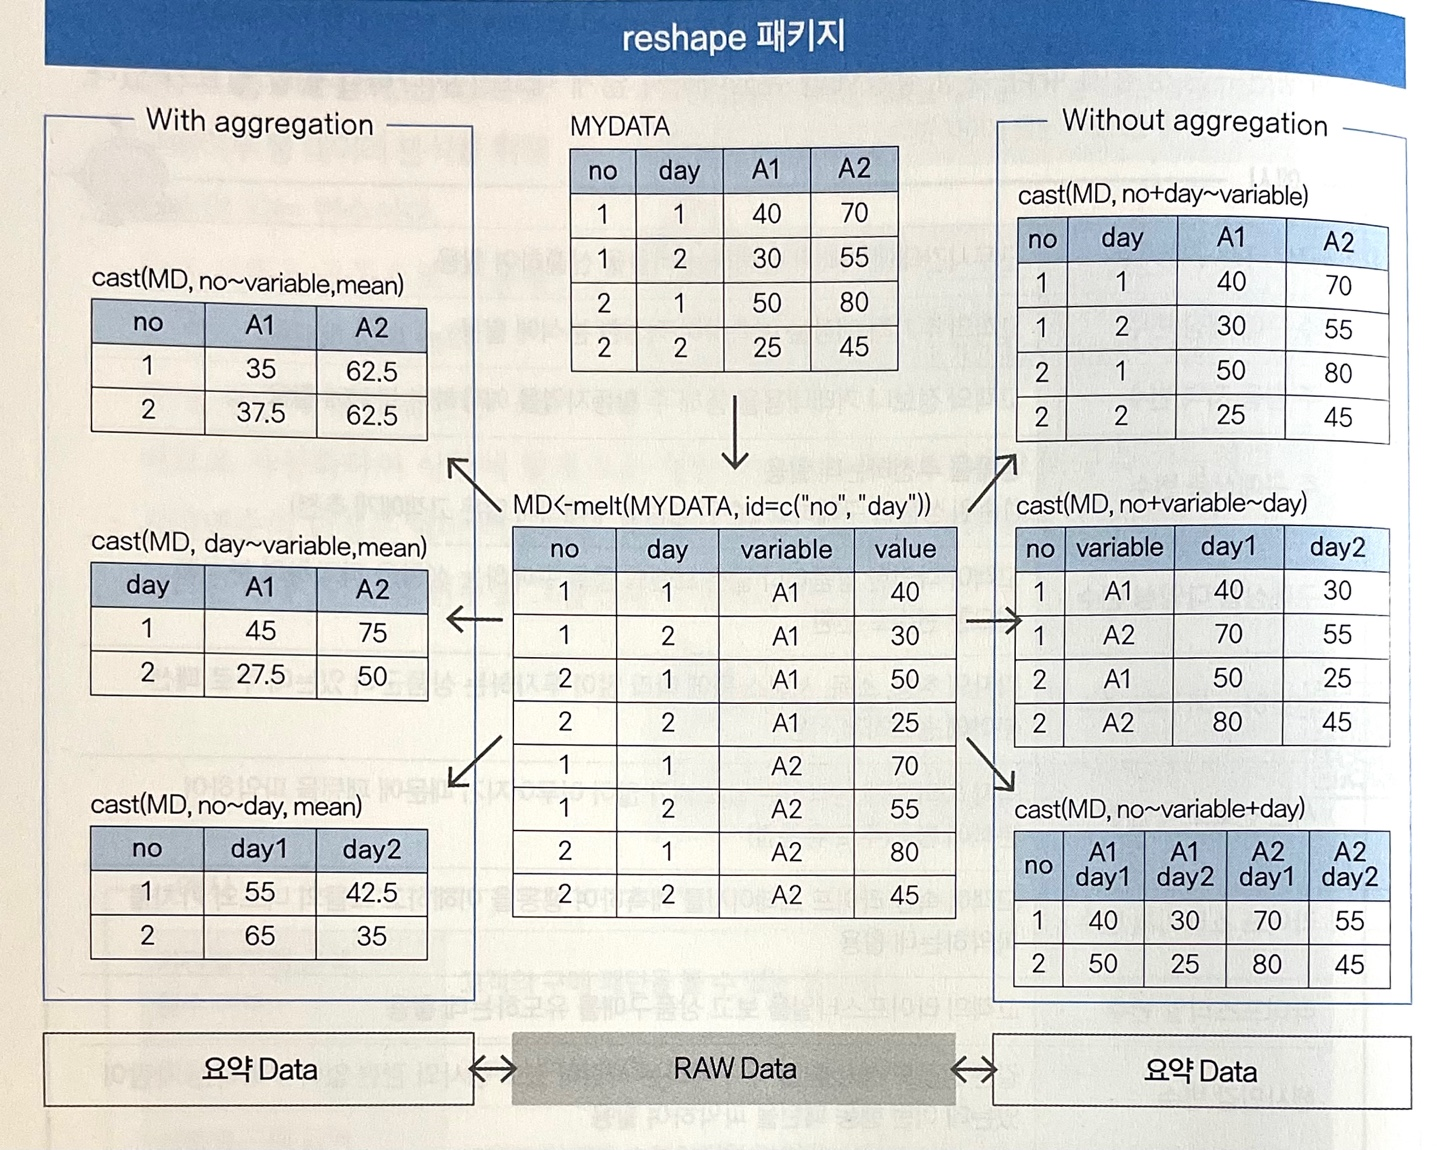

※ 변수 산출 이후 수치형 데이터지만 명목척도, 범주형 데이터 중 순서척도(서열척도) 등의 정의에 부합하는 자료형으로 변환하는 과정이 필요하다.<br>
$~~~$ 예시)`as.factor(순서척도데이터, levels=서열)`
    

#### 3) Data Cleansing
- 변수 중요도 탐색<br>
  klaR 패키지의 greedy.wilks()가 종속변수와 변수간 wilks lambda(=집단내분산/총분산, 데이터설명비율)로 계산한 중요도를 확인한다.
- 결측치 처리
  - 결측치 인식<br>
    `is.na(변수) = is.null(변수) = na.omit(변수)`(결측치가 있으면 True, 없으면 False 반환),<br>`compelete.cases(변수)`(결측치가 있으면 False, 없으면 True 반환)
  - 결측치 삭제<br>
  \> `변수[sapply(변수, is.na/is.null/na.omit] = 변수[is.na(변수)/is.null(변수)/na.omit(변수)] <- NULL`<br>
  \> `변수[변수==결측치대체값] <- NULL`
  - 결측치 대체<br>
  DMwR패키지의 `centralImputation`(중앙값/최빈값 대체)$\cdot$`knnImputation`(가중평균 대체),<br>
  randomForest패키지의 `rfImpute`(결측 존재 시 에러 발생)

### 2. 데이터 분석
- 상관분석
  - `cov(x,y,use="everthing", method=c("pearson", "kendall", "spearman"))`: 공분산
  - `cor(x,y,use="everthing", method=c("pearson", "kendall", "spearman"))`: 상관계수
  - `rcorr(MATRIX, type=c("pearson", "kendall", "spearman"))`:Hmisc 패키지를 사용한 상관분석
  - `cor.test(x, y, method=c("pearson", "kendall", "spearman")): 상관분석 가설검정

- 로지스틱 회귀분석
  - `glm(Y ~ X1+X2+...Xk, family=binomial, data=DATA)`

#### $~~$ ※ 텍스트마이닝(tm 패키지)
$~~~$1. 데이터 마이닝
- XML 문서를 text로 전환<br>
  \> tm_map(데이터, as.PlainTextDocument)
- Space 제거, 소문자로 반환, 띄어쓰기<br>
  \> `tm_map(데이터, stripWhiteSpace|tolower|removewords, stopwords('english'))`
  
$~~~$ 2. TermDocumentMatrix 또는 DocumentTermMatrix 생성
- TermDocumentMatrix 생성<br>
  \> TermDocumentMatrix(데이터, control=list(문서전처리_옵션))<br>
  ※ `inspect()`로 빈도표 결과를 확인할 수 있다.
- 단어 선택
  - 특정 빈도수 이상 사용된 단어 선택<br>
    \> findFreqTerms(빈도표, 특정빈도수)
  - 특정 단어와 기준 이상 연관성 있는 단어 선택<br>
    \> findAssocs(빈도표, 특정단어, 기준)
    
$~~~$ 3. Corpus 생성
- Vcorpus(): corpus를 메모리에 생성하는 함수
- Pcorpus(): corpus를 외부나 파일로 관리되게 생성하는 함수

$~~~$ ※ 사회연결망 분석
- WALKRAP 알고리즘<br>
  \> walktrap.community(데이터, step, modularity=T)
- Edge Betweenness Method<br>
  \> edge.betweenness.community(데이터)

※ `summary(변수)` 등으로 분석 중간중간에 데이터 내 Insight를 파악한다.

### 3. Save Data
\> `write.csv(변수, "파일이름.csv", row.names/col.names)`